# Project Atlantic meridional overturning circulation (AMOC)

In this project, you will practice with the solution of nonlinear (stochastic) differential
equations using a conceptual model of the AMOC. The consequences of this nonlinear
coupling of the temperature, salinity and AMOC can be studied in its simplest form using
a two-box model. A sketch of a variant of this model is shown in Fig. 1.

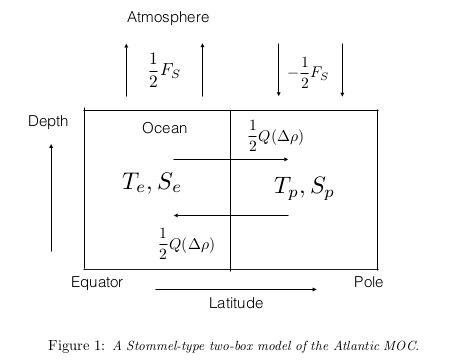

A polar box (with temperature $T_p$ and salinity $S_p$) and an equatorial box (with temperature $T_e$ and salinity $S_e$) having the same volume $V_0$ are connected by an overturning
flow and exchange heat and fresh water with the atmosphere. The heat and salt balances
are
$$\frac{d T_e}{dt} = - \frac{1}{t_r} (T_e - (T_0 + \frac{\theta}{2})) - \frac{1}{2} Q(\Delta \rho)(T_e - T_p) \label{eq:1a} \tag{1a}$$
$$\frac{d T_p}{dt} = - \frac{1}{t_r} (T_p - (T_0 - \frac{\theta}{2})) - \frac{1}{2} Q(\Delta \rho)(T_p - T_e) \label{eq:1b} \tag{1b}$$
$$\frac{d S_e}{dt} = \frac{F_S}{2 H} S_0 - \frac{1}{2} Q(\Delta \rho)(S_e - S_p) \label{eq:1c} \tag{1c}$$
$$\frac{d S_p}{dt} = - \frac{F_S}{2 H} S_0  - \frac{1}{2} Q(\Delta \rho)(S_p - S_e) \label{eq:1d} \tag{1d}$$
where $F_S$ is the fresh water flux, $H$ the ocean depth, $t_r$ is the surface temperature restoring
time scale and $\theta$ is the equator-to-pole atmospheric temperature difference. The transport
function $Q$ is chosen as
$$Q(\Delta \rho) = \frac{1}{t_d} + \frac{q_0}{V_0} \left( \frac{\Delta \rho}{\rho_0} \right)^2 \label{eq:2} \tag{2}$$
where $q_0$ is a transport coefficient, $t_d$ a diffusion time and $\Delta \rho = \rho_p - \rho_e$.
Subtracting [(1b)](#mjx-eqn-eq:1b) from [(1a)](#mjx-eqn-eq:1a) and [(1d)](#mjx-eqn-eq:1d) from [(1c)](#mjx-eqn-eq:1c) and introducing $\Delta T = T_e - T_p$ and
$\Delta S = S_e - S_p$ leads to
$$\frac{d \Delta T}{dt} = - \frac{1}{t_r} (\Delta T - \theta) - Q(\Delta \rho) \Delta T \label{eq:3a} \tag{3a}$$
$$\frac{d \Delta S}{dt} = \frac{F_S}{H} S_0 - Q(\Delta \rho) \Delta S \label{eq:3b} \tag{3b}$$
When non-dimensional quantities $x$ and $y$ are introduced according to $\Delta T = x\, \theta$, $\Delta S = y \,\alpha_T\, \theta \, /  \,\alpha_S$ and time is scaled with $t_d$ , the non-dimensional system of equations [(3)](#mjx-eqn-eq:3a) becomes
$$\frac{d x}{dt} = - \alpha (x - 1) - x (1 + \mu(x-y)^2) \label{eq:4a} \tag{4a}$$
$$\frac{d y}{dt} = F - y (1 + \mu(x-y)^2) \label{eq:4b} \tag{4b}$$
where $\alpha = t_d /t_r$ and
$$\mu = \frac{q_0 t_d (\alpha T \theta)^2}{V_0} \label{eq:5} \tag{5}$$
is the ratio of the diffusion time scale td and the advective time scale $t_a = V_0 /(q_0 (\alpha_T \theta)^2)$.
Finally, the dimensionless freshwater flux parameter F is given by
$$F = \frac{\alpha_S S_0 t_d}{\alpha_T \theta H} F_S \label{eq:6} \tag{6}$$

Typical values of the non-dimensional parameters are $\alpha = 130$, $F = 1.1$ and $\mu = 6.2$. The volume $V_0$ is for example based on the area of transport near the western boundary in the Atlantic Ocean and $q_0$ is determined from the strength of the southward branch of the AMOC.


## Exercises (and solutions)

*Preambula:*

In [1]:
import PyDSTool as dst
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times'],'size':16})


### *(i)* Argue that, because $\alpha \gg 1$, the equations [(4)](#mjx-eqn-eq:4a) can be well approximated by
$$ \frac{d y}{dt} = F - y (1 + \mu (1 - y)^2 ) \label{eq:7} \tag{7}$$



***Solution:***

If $\alpha \gg 1$, then Eq. [(4a)](#mjx-eqn-eq:4a) can be approximated by
$$\frac{d x}{dt} = - \alpha (x - 1)$$
which admits a single stable fixed point $x = 1$. Replacing this in equation [(4b)](#mjx-eqn-eq:4b) then gives the result.


### *(ii)* Write a Python program to integrate the equations [(7)](#mjx-eqn-eq:7) in time, given initial conditions $y(t = 0) = y_0$.

***Solution:***

We will use PyDSTool to integrate this equation:

In [2]:
# name of the model
DSargs = dst.args(name='AMOC')
# parameters
DSargs.pars = { 'mus': 6.25,
                'F': 1.1  }
# rhs of the differential equation
DSargs.varspecs = {'y': 'F - y*(1 + mus*(1-y)**2)'}
# initial conditions
DSargs.ics      = {'y': 1.5}

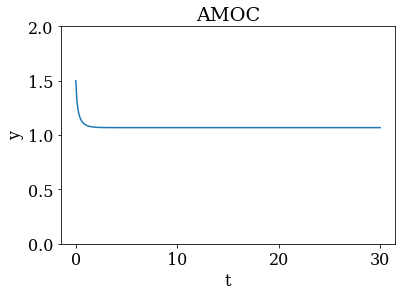

In [3]:
DSargs.tdomain = [0,30]                         # set the range of integration.
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.
traj = ode.compute('polarization')              # integrate ODE
pts  = traj.sample(dt=0.1)                      # Data for plotting

# PyPlot commands
plt.plot(pts['t'], pts['y'])
plt.xlabel('t')                                 
plt.ylabel('y')                                
plt.ylim([0,2])                                 
plt.title(ode.name);                        

### *(iii)* Show numerically that for $F = 1.1$, there exist at least two steady states of the model [(7)](#mjx-eqn-eq:7). 
Give a physical interpretation of these states (in terms of the AMOC, salinity and temperature).


***Solution:***

To do that, we will integrate the model with a lot of different initial conditions:

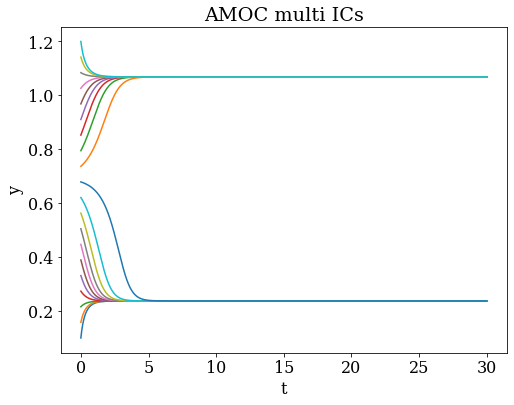

In [4]:
fig = plt.figure(figsize=(8,6))
for i, y0 in enumerate(np.linspace(0.1,1.2,20)):
    ode.set( ics = { 'y': y0 } )                # Initial condition
    tmp = ode.compute('pol%3i' % i).sample()    
    plt.plot(tmp['t'], tmp['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.title(ode.name + ' multi ICs')
plt.show()

We can plot the tranport term $Q(\Delta \rho)$ (nondimensionalized to $(1 + \mu (1 - y)^2)$) for these two states:

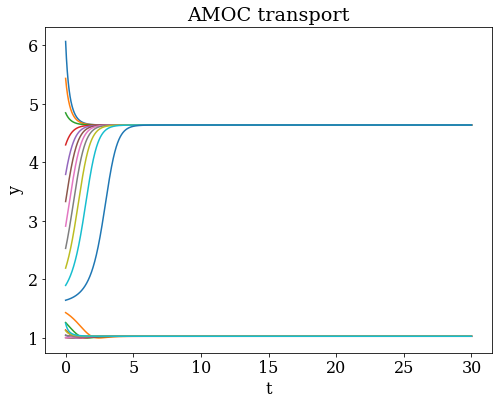

In [5]:
fig = plt.figure(figsize=(8,6))
for i, y0 in enumerate(np.linspace(0.1,1.2,20)):
    ode.set( ics = { 'y': y0 } )                # Initial condition
    tmp = ode.compute('pol%3i' % i).sample()    
    plt.plot(tmp['t'], 1. + DSargs.pars['mus'] * (1. - tmp['y'])**2)
plt.xlabel('t')
plt.ylabel('y')
plt.title(ode.name + ' transport')
plt.show()

And we see that in one state AMOC is diminished, while in another one it is enhanced.

### *(iv)* Compute the bifurcation diagram for [(7)](#mjx-eqn-eq:7) with $F$ as control parameter and determine the values of $F$ at the saddle-node bifurcations, for example using the PyDSTool package.


***Solution:***


LP Point found 
LP Point found 


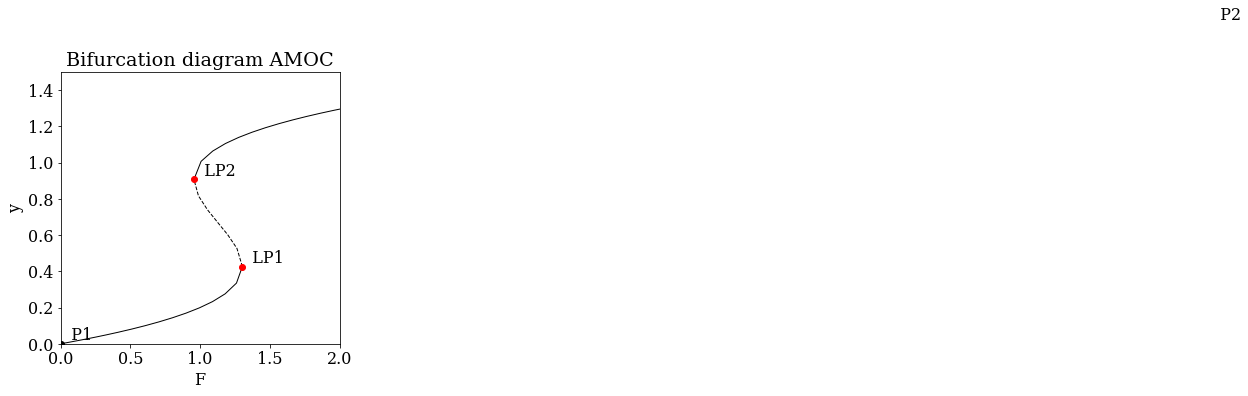

In [6]:
fig = plt.figure(figsize=(5,5))

# Prepare the system to start close to a steady state
ode.set(pars = {'F': 0} )       # Lower bound of the control parameter 
ode.set(ics =  {'y': 0} )       # Close to one of the steady states present for this parameter

PC = dst.ContClass(ode)         # Set up continuation class

PCargs = dst.args(name='EQ1', type='EP-C')     # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['F']                    # control parameter(s) (it should be among those specified in DSargs.pars)
PCargs.MaxNumPoints = 100                      # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 0.1
PCargs.MinStepSize  = 1e-5
PCargs.StepSize     = 2e-2
PCargs.LocBifPoints = 'LP'                     # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                     # to tell unstable from stable branches
PC.newCurve(PCargs)
PC['EQ1'].forward()
PC.display(['F','y'], stability=True, figure=fig)  # stable and unstable branches as solid and dashed curves, resp.
plt.xlim(0,2)
plt.ylim(0,1.5)
plt.title("Bifurcation diagram AMOC");

We observe two back-to-back saddle-node bifurcations at the values $F=1.303230246596396$ and $F=0.9560290126628649$ :

In [7]:
PC.curves['EQ1'].getSpecialPoint('LP1')

F:  1.303230246596396
y:  0.42629664482152013
Labels: EP ({'data': args (
 V = {'y': 0.9999999999998379, 'F': -5.694333893769958e-07},
 ds = 0.1,
 evals = [5.69433389e-07+0.j],
 evecs = [[1.]]
), 'stab': 'N'})
Labels: LP ({'data': args (
 X = {'y': 0.42629664482152013, 'F': 1.303230246596396},
 V = {'y': 0.9999999999998379, 'F': -5.694333893769958e-07},
 a = 4.506937909080448,
 eigs = [5.69433389e-07+0.j]
), 'plot': No args defined, 'name': 'LP1'})

In [8]:
PC.curves['EQ1'].getSpecialPoint('LP2')

F:  0.9560290126628649
y:  0.9070368182428525
Labels: EP ({'data': args (
 V = {'y': 0.99999999999982, 'F': 5.998535001876149e-07},
 ds = 0.1,
 evals = [-5.998535e-07+0.j],
 evecs = [[1.]]
), 'stab': 'N'})
Labels: LP ({'data': args (
 X = {'y': 0.9070368182428525, 'F': 0.9560290126628649},
 V = {'y': 0.99999999999982, 'F': 5.998535001876149e-07},
 a = 4.5069403421110765,
 eigs = [-5.998535e-07+0.j]
), 'plot': No args defined, 'name': 'LP2'})

## Stochastic model

We next consider the extended nonlinear stochastic Stommel model where the freshwater forcing has a transient and stochastic component given by the equations

$$dY_t = (\bar F - Y_t (1 + \mu (1 - Y_t)^2)) \, dt + \bar F dZ_t  \label{eq:8a} \tag{8a}$$
$$ d Z_t = g(t) \, dt + \sigma \, dW_t \label{eq:8b} \tag{8b}$$

where $g(t)$ describes a time dependence of the freshwater forcing, $\bar F$ the reference value of $F$, $\sigma$ represents the noise amplitude and $W_t$ is a Wiener process.


### *(v)* Write a Python program to integrate the system of SDEs (8) using the Euler-Maruyama (EM) scheme. 
Determine a solution of the equations for $\bar F = $ 1.1, $\sigma = $0.1, $\mu =$ 6.2 and $g(t) =$ 0. Make a plot of the probability density function for this case.

***Solution:***

The [Euler-Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) can be implemented as follow:

In [9]:
# extra exercise here: code a random number generator yourself !
def dW(dt):
    """Sample a random number at each call.
    
    Parameters
    ----------
    dt: float
        The timestep.
    
    Returns
    -------
    dW: float
        A realization of the derivative of the Wiener process.
    """
    return np.random.normal(loc=0.0, scale=np.sqrt(dt))

def stochastic_integrate(func, dt, num_step, param, ic, sigma):
    """Integrate a 2D equation with the Euler-Maruyama scheme.
    
    Parameters
    ----------
    func: callable
        The functions g in equation (xd). Should take the two arguments x and x_delta.
    dt: float
        The timestep.
    num_steps: int
        The number of steps to compute and return.
    param: dict
        Additional parameters to pass to the function `func`.
    ic: array
        The initial condition.
    sigma: array
        The noise standard deviation for each variable.
        
    Returns
    -------
    (time, trajectory): array_like
        Times and trajectory.
    """
    # lists to store the trajectory
    trajectory = [ic]
    time = [0.]
    # Setting the initial condition
    x = ic
    for i in range(num_step):
        # Computing one Euler-Maruyama step 
        xnew = x + func(x, time[-1], **param) * dt + sigma * dW(dt)
        x = xnew
        # Saving the new state in the trajectory lists
        trajectory.append(x)
        time.append(time[-1]+dt)

    # Converting lists to numpy arrays on output
    return np.array(time), np.array(trajectory)

We can now code equation [(8)](#mjx-eqn-eq:8a):

In [10]:
def AMOC_noise(Y, t, Fbar=1., mu=1., g=None):
    """Function defining the deterministic part of equation (8)
    
    Parameters
    ----------
    Y: float
        Nondimensional salinity difference between the two boxes.
    t: float
        Time. Used if the system is not autonomous.
    Fbar: float
        Value of the effective freshwater forcing (nondimensionalized).
    mu: float
        Ratio of diffusive and advective timescale.
    g: callable
        Function of time defining the drift of the noise.
    """
    f = Fbar - Y * (1 + mu * (1 - Y)**2)
    if g is not None:
        f += Fbar * g(t)
    return f

and integrate it for the given parameters:

In [11]:
%%time

Fbar = 1.1
sigma = 0.1
mu = 6.2

time, trajectory = stochastic_integrate(AMOC_noise, 0.01, 400000, {'Fbar': Fbar, 'mu': mu}, 1.1, Fbar * sigma)

CPU times: user 1.45 s, sys: 0 ns, total: 1.45 s
Wall time: 1.46 s


and finally plot the distribution of the long trajectory obtained:

In [12]:
def plot_hist(x, y, ax, ax_histy, binwidth = 0.01, plot_kwargs=None, hist_kwargs=None):
    """Helper function to plot a trajectory and its histogram besides."""
    if plot_kwargs is None:
        plot_kwargs = dict()
        
    if hist_kwargs is None:
        hist_kwargs = dict()
    
    # no labels
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.plot(x, y, **plot_kwargs)

    # now determine the bins:
    bins = np.arange(np.min(y), np.max(y) + binwidth, binwidth)
    ax_histy.hist(y, bins=bins, orientation='horizontal', **hist_kwargs)

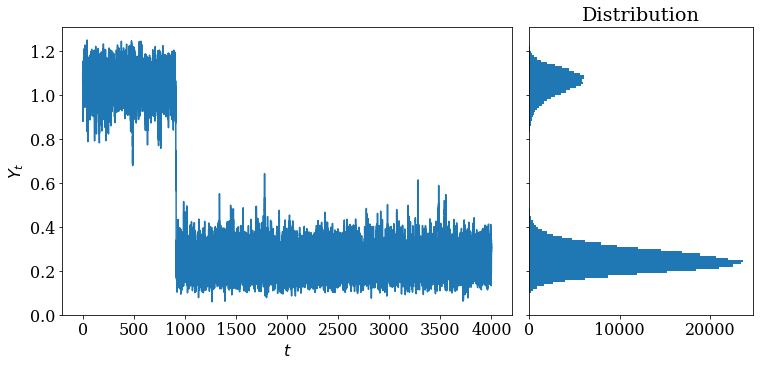

In [13]:
fig = plt.figure(figsize=(12, 5))

gs = fig.add_gridspec(1, 2,  width_ratios=(4, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.35)

ax = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)

plot_hist(time, trajectory, ax, ax_histy)

ax.set_xlabel(r'$t$')
ax.set_ylabel(r"$Y_t$")
ax_histy.set_title('Distribution');

### *(vi)* Determine the equilibrium solution of the Fokker-Planck equation for this case (so $g(t) = $0) analytically, and compare the result with that in *(v)*.


***Solution:***

The Fokker-Planck equation for this system is

$$\partial_t \mathcal{P}(Y,t) = - \partial_Y \left[ (\bar F - Y (1 + \mu (1 - Y)^2))\, \mathcal{P}(Y,t)\right] + \frac{(\bar F \sigma)^2}{2} \partial_Y^2 \mathcal{P}(Y,t) $$
The stationnary solution $\mathcal{P}_s(Y)$ is determined by the equation:
$$0 = - \frac{d}{dY} \left[ (\bar F - Y (1 + \mu (1 - Y)^2))\, \mathcal{P}_s(Y)\right] + \frac{(\bar F \sigma)^2}{2} \frac{d^2}{dY^2} \mathcal{P}_s(Y) $$
which possesses the following solution:
$$\mathcal{P}_s(Y) = \mathcal{N} \, \exp \left[\frac{2}{(\bar F \sigma)^2} \int_{-\infty}^Y (\bar F - Y' (1 + \mu (1 - Y')^2)) \, dY' \right] $$
where $\mathcal{N}$ is a normalization factor, and thus
$$\mathcal{P}_s(Y) = \mathcal{N} \, \exp \left[\frac{2}{(\bar F \sigma)^2} \left(Y \bar F - \frac{Y^2}{2} (1 + \mu) + 2 \mu \frac{Y^3}{3} - \mu \frac{Y^4}{4} \right)\right] $$
We can plot this solution (with $\mathcal{N} = 10^{-4}$) as a function of $Y$ to get:

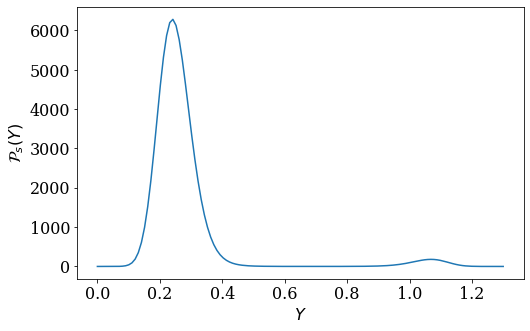

In [14]:
plt.figure(figsize=(8,5))
Y = np.linspace(0.,1.3, 130)
plt.plot(Y, 1.e-4 * np.exp((2/(Fbar * sigma)**2)*(Y * Fbar - (Y**2/2) * (1+mu) + 2 * mu * (Y**3/3) - mu * (Y**4/4))));
plt.xlabel('$Y$')
plt.ylabel(r'$\mathcal{P}_s(Y)$');

and we see that it corresponds qualitatively to the one computed above.

### *(vii)* Next, consider the stochastic case with $g(t) = \varepsilon t$ and $\varepsilon  = 0.001$.
Study the behavior of the model for increasing noise amplitude (again with $\bar F = $1.1 and $\mu = $6.2). What type of tipping occurs when $\sigma$ increases?


***Solution:***
    
First we define $g$:

In [15]:
epsilon = 1.e-3

def g(t):
    return epsilon * t
    

Now because the system is not stationary, we need to consider multiple realizations of it to obtain averages. Therefore we integrate an ensemble of 1000 realizations for various $\sigma$:

In [16]:
%%time

sigma_vec = [0.01, 0.05,0.1,0.175,0.25,0.3]
mean_trajectory = list()
number_of_trajectory = 1000
number_of_steps = 40000

for sigma in sigma_vec:
    
    noisy_trajectory = list()

    for i in range(number_of_trajectory):
        ic = np.random.random()
        time, trajectory = stochastic_integrate(AMOC_noise, 0.01, number_of_steps, {'Fbar': Fbar, 'mu': mu, 'g':g}, ic, Fbar * sigma)
        noisy_trajectory.append(trajectory)

    mean_trajectory.append(np.array(noisy_trajectory))
mean_trajectory = np.array(mean_trajectory)

CPU times: user 14min 50s, sys: 1.49 s, total: 14min 51s
Wall time: 14min 51s


and plot the ensemble mean:

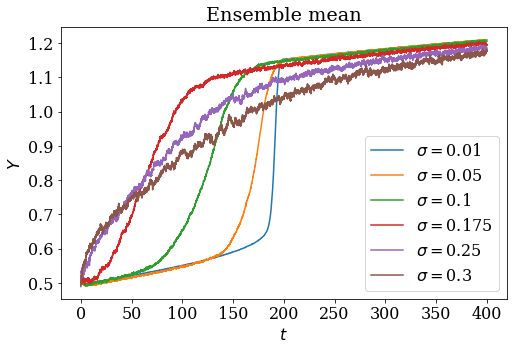

In [17]:
fig = plt.figure(figsize=(8, 5))
for i, sigma in enumerate(sigma_vec):
    plt.plot(time, np.mean(mean_trajectory[i], axis=0), label=r'$\sigma = $'+str(sigma))

plt.xlabel(r'$t$')
plt.ylabel(r'$Y$')
plt.title('Ensemble mean')
plt.legend();

We see that due to the noise, the tipping occurs sooner (on average).